# Project A - RUC0066


## Import of useful packages

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

## Creation of dataframe from csv-styled dataset

In [7]:
df = pd.read_csv('student-por.csv')

## Dataset structure visualization
- Based on this output we can tell how many rows and columns this dataset contains
- We can also see count of non-null values for each data group as well as theirs datatype
- This dataset has 33 columns overall with each of them having 649 records (ranging from 0 to 648)
- There are 16 int64 dtypes and 17 object dtypes

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# Dataset Statisctics
- This output shows us the statistical summary of the dataset

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Data Visualization


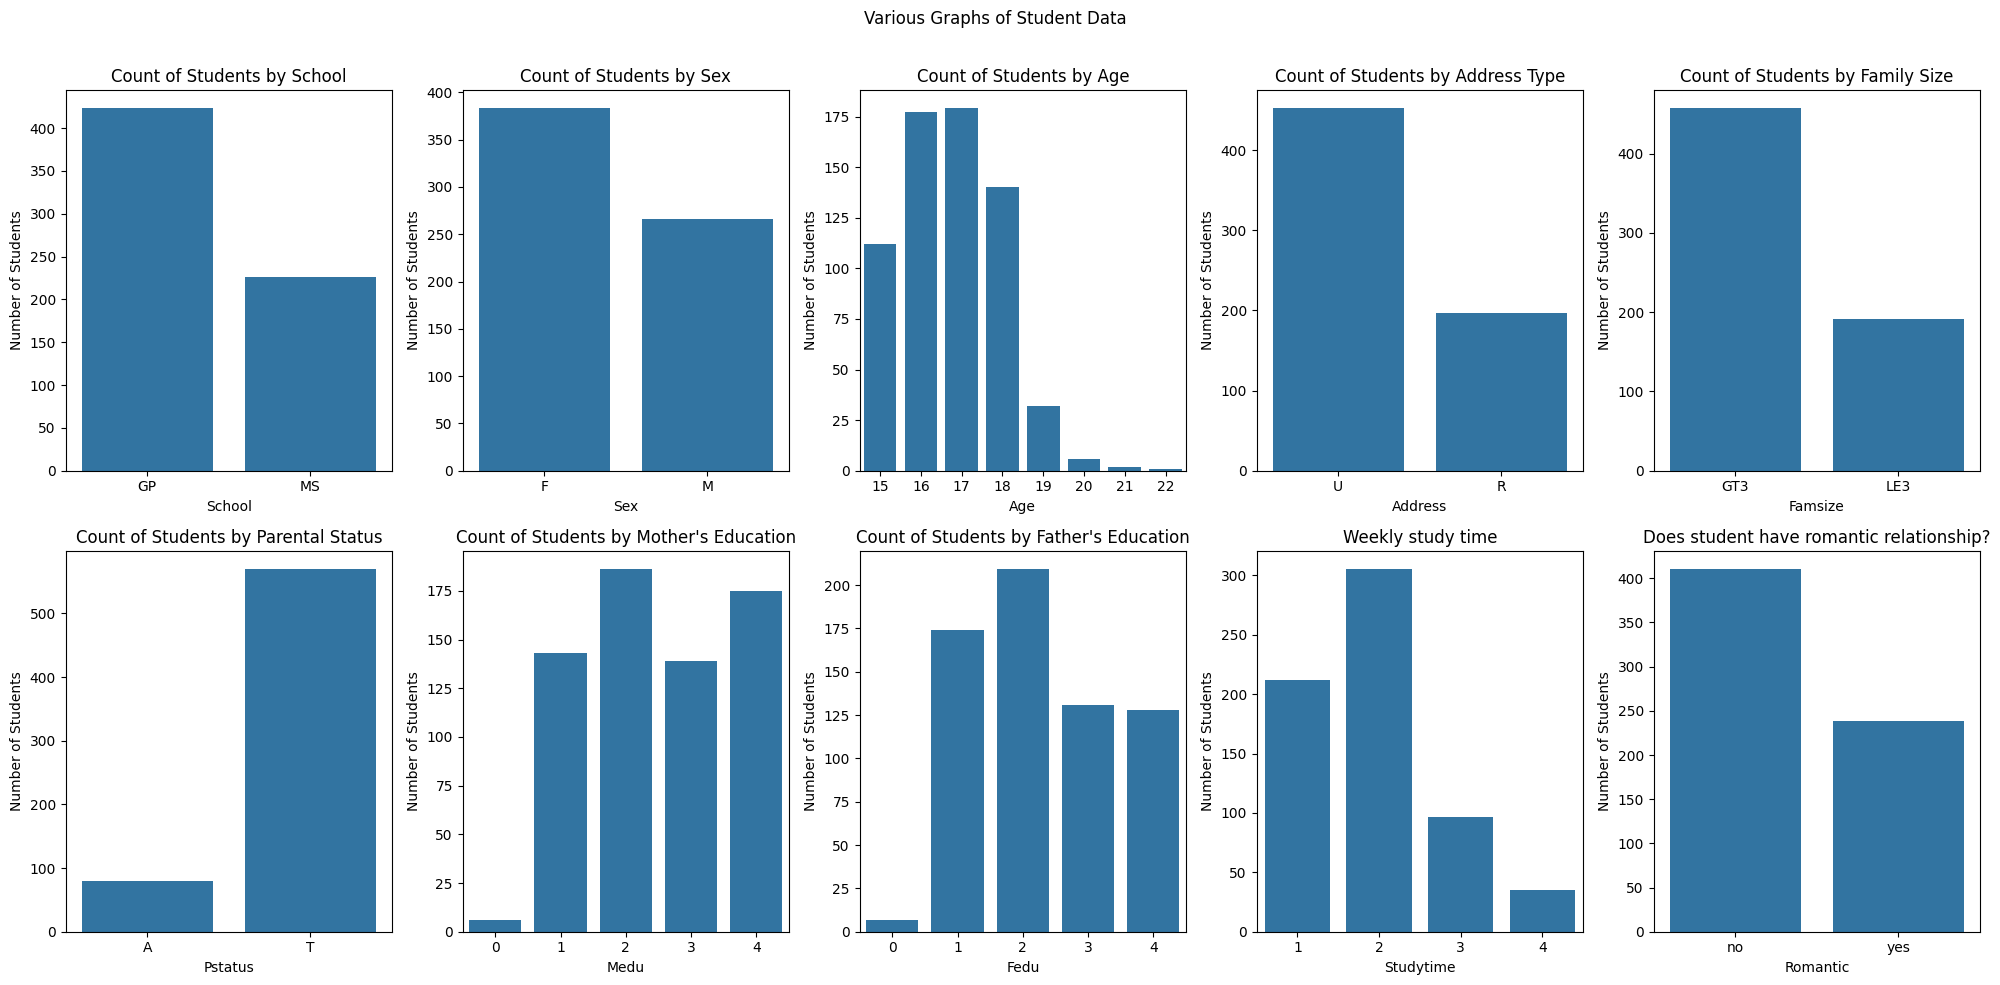

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Various Graphs of Student Data')

columns_to_plot = [
    ('school', 'Count of Students by School'),
    ('sex', 'Count of Students by Sex'),
    ('age', 'Count of Students by Age'),
    ('address', 'Count of Students by Address Type'),
    ('famsize', 'Count of Students by Family Size'),
    ('Pstatus', 'Count of Students by Parental Status'),
    ('Medu', 'Count of Students by Mother\'s Education'),
    ('Fedu', 'Count of Students by Father\'s Education'),
    ('studytime', 'Weekly study time'),
    ('romantic', 'Does student have romantic relationship?'),
]

for ax, (column, title) in zip(axes.flatten(), columns_to_plot):
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Number of Students')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Description
- Famsize
  - More than 2/3 of the students are part of families with 4 or more members. Thats kinda interesting, because the usual birth rate in developed countries tends to fall nowadays (I think its around 1.5 children per family). Based on this graph, we can confidently say that the birth rate is at least 1.7.
- Studytime
  - Based on the dataset's description, we clearly see that the majority of students spend 2-5 hours per week studying. The most diligent students (almost 50 of them) spend over 10 hours per week studying.
- Romantic
  - Also what kinda surprises me is the fact that only around 40% of the students are experiencing some kind of romantic relationship. I would expect this number to be higher. 

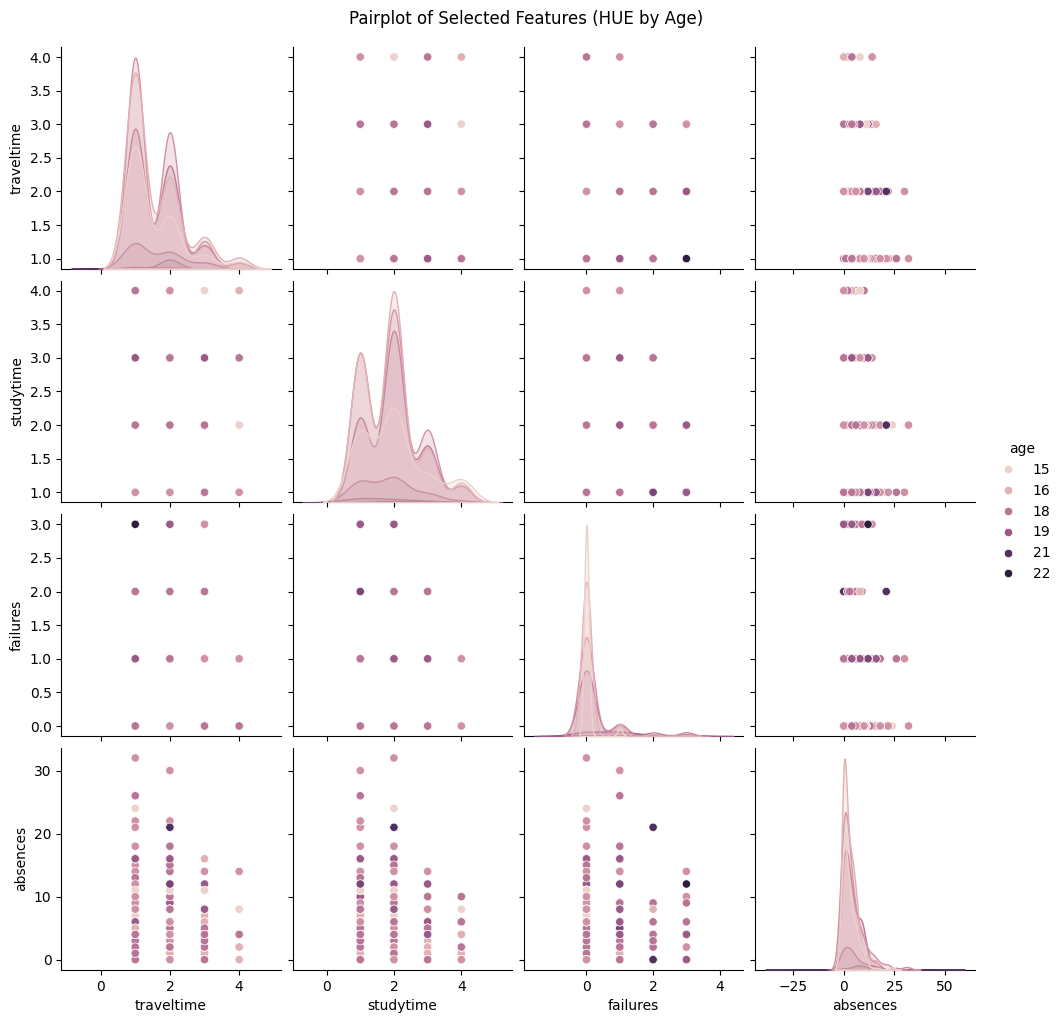

In [40]:
features = [
    'traveltime',
    'studytime',
    'failures',
    'absences',
]

sns.pairplot(df, vars=features, hue='age')
plt.suptitle('Pairplot of Selected Features (HUE by Age)', y=1.02)
plt.show()


### Description
#### Single Data
- Age
Most students in this dataset are aged between 16 and 18 with a significant drop after those year. This is due to typical age of graduation from highschool.
Interesting to see that there are some students that are 21 or 22 and still studying secondary schoo;.

- Traveltime
Most students have a short commute time. I would say that roughly over 85% students live nearby school and dont have to commute for more than 1 hour.
Based on this fact we can say that the schools in this city are in well-connected areas.

- Absences
We can see that most students are in the area within 15 days of absence. This strongly indicate that this is maximum number of absence set down by school.
This plot also indicates that there was a small number of students that had absence over 30 days. Since it concerns only a couple of students its acceptable.


#### Comparison
- Absences vs. Travel Time:
The scatterplot shows a wide distribution of absences across different travel times.
Absences are more sitauated at lower travel times. Even there isn't a strong correlation between these variables we can say that those, who commute to school from further away, tend to have less absences.

- Absences vs. Failures:
The scatterplot indicates that higher failures are associated with varying levels of absences, but there’s no clear linear trend.
Students with zero failures tend to have a wide range of absences, while those with more failures cluster around smaller range of absences.
Me personally I would expect those students with numerous failures to have higher absence count that is shown in graph.

## Correlation


In [50]:
show_cols = ['age','Medu','Fedu','freetime','goout','health','absences','G1','G2','G3']
corr_mat = df[show_cols].corr()
corr_mat

,age,Medu,Fedu,freetime,goout,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,-0.004910,0.112805,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.019686,0.009536,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,0.006841,0.027690,0.044910,0.029859,0.217501,0.225139,0.211800
freetime,-0.004910,-0.019686,0.006841,1.000000,0.346352,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.346352,1.000000,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
health,-0.008750,0.004614,0.044910,0.084526,-0.015741,1.000000,-0.030235,-0.051647,-0.082179,-0.098851
absences,0.149998,-0.008577,0.029859,-0.018716,0.085374,-0.030235,1.000000,-0.147149,-0.124745,-0.091379
G1,-0.174322,0.260472,0.217501,-0.094497,-0.074053,-0.051647,-0.147149,1.000000,0.864982,0.826387
G2,-0.107119,0.264035,0.225139,-0.106678,-0.079469,-0.082179,-0.124745,0.864982,1.000000,0.918548
G3,-0.106505,0.240151,0.211800,-0.122705,-0.087641,-0.098851,-0.091379,0.826387,0.918548,1.000000


<Axes: >

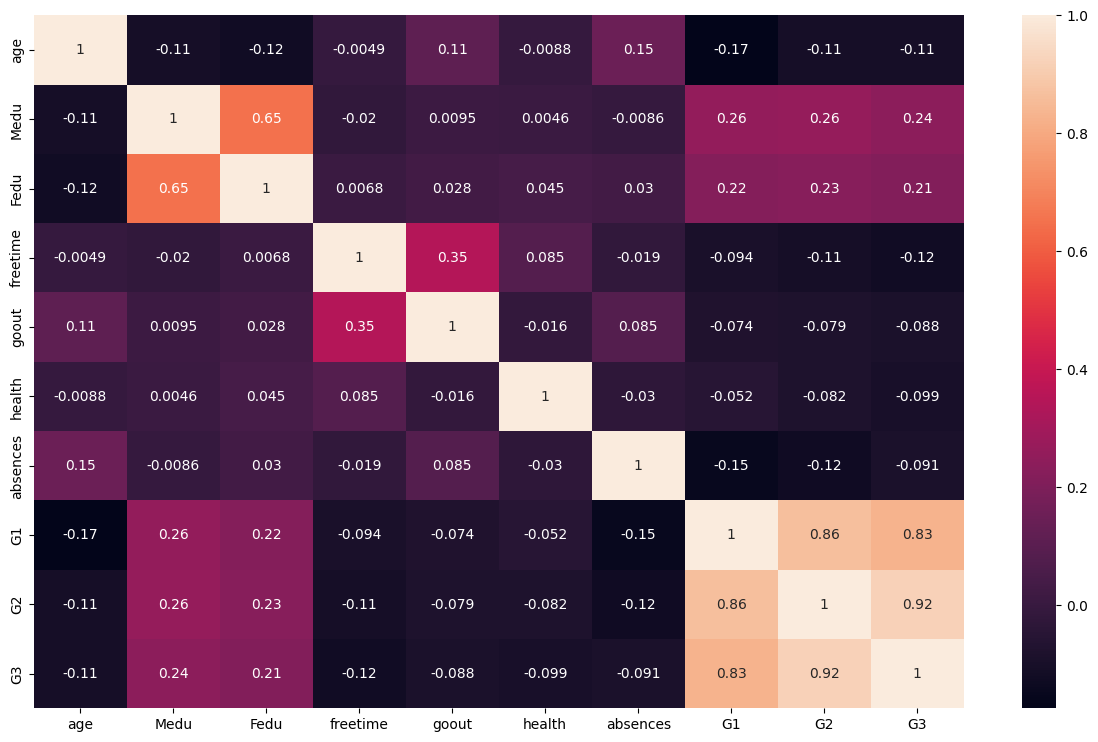

In [57]:
plt.figure(figsize=(15, 9))

sns.heatmap(corr_mat, annot=True)

## HeatMap Description
### Grades
- Grades are strongly connected. This means that if a student does well in one grade, they are likely to do well in the next.
### Parents education
- Education of parents have a medium positive relationship. If one parent is well-educated, the other is also likely to be.
### Absence and grades
- There is almost no relationship between absences and grades. This is surprising because we might expect students who miss more school to get lower grades.
### Health and grades
- Health does not affect grades much. Students with different health levels perform similarly.
### Age
- Age has very little effect on other features, like grades or absences.

# **Clustering**

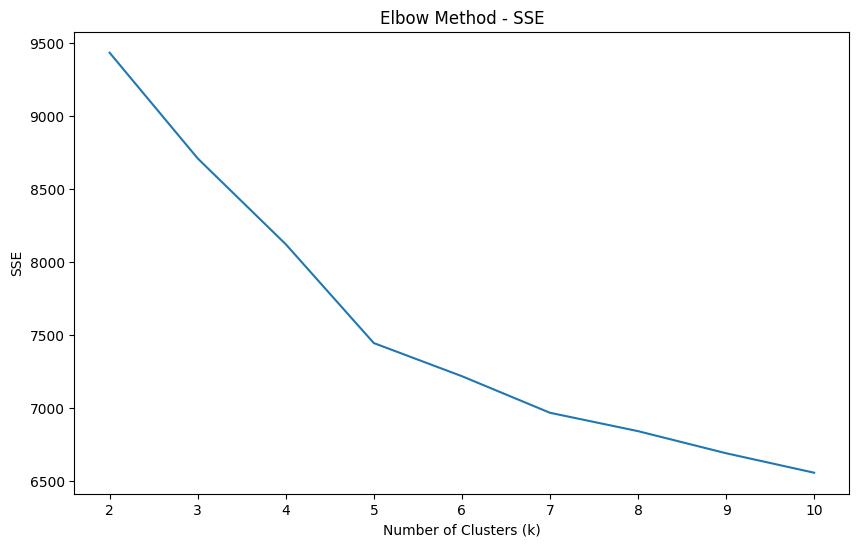

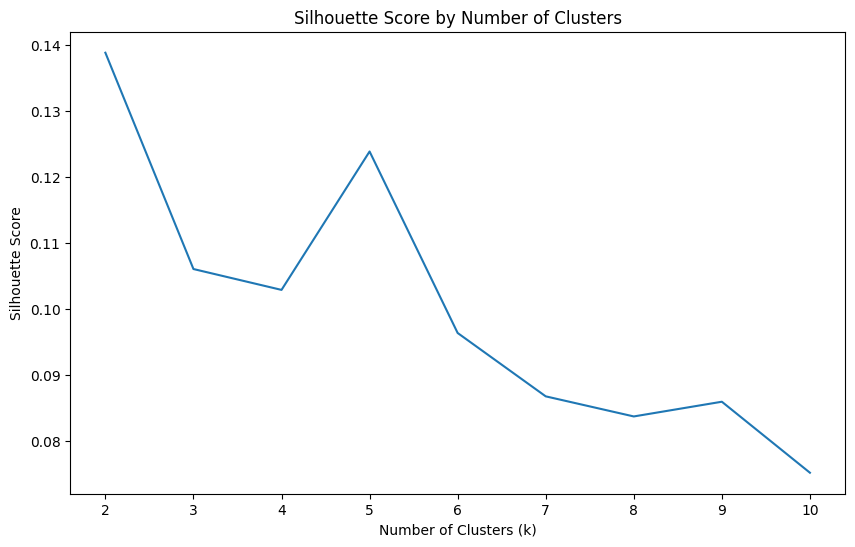

In [29]:
numeric_df = df.select_dtypes(include=['number'])

scaler = sklearn.preprocessing.StandardScaler()
X_stand = scaler.fit_transform(numeric_df)

scores = [
    {
        'k': k,
        'sse': sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X_stand).inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_stand, sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit_predict(X_stand))
    }
    for k in range(2, 11)
]

df_scores = pd.DataFrame(scores).set_index('k')

plt.figure(figsize=(10, 6))
df_scores['sse'].plot(title='Elbow Method - SSE', ylabel='SSE', xlabel='Number of Clusters (k)')
plt.show()

plt.figure(figsize=(10, 6))
df_scores['silhouette'].plot(title='Silhouette Score by Number of Clusters', ylabel='Silhouette Score', xlabel='Number of Clusters (k)')
plt.show()

## Description
### Elbow Method - SSE
- SSE means Sum of Squared Errors which decreases as number of clusters (k) increases. This creates shape, that can seen like elbow.
- This "elbow" is a point where adding additional clusters stop significantly reducing SSE
- Based on elbow method I would say that ideal number of cluster is **6**

### Silhouette Score
- Indicates how well are the clusters separated
- The higher the value is the ideal the number of clusters it is.
- Based on this method its visible that the best number of clusters is **4**

### Conclusion
- Since on elbow method its more clear, that the ideal number of clusters is 6 and in Silhouette score suggest either 4 or 6, im choosing 6 clusters


# K-Means


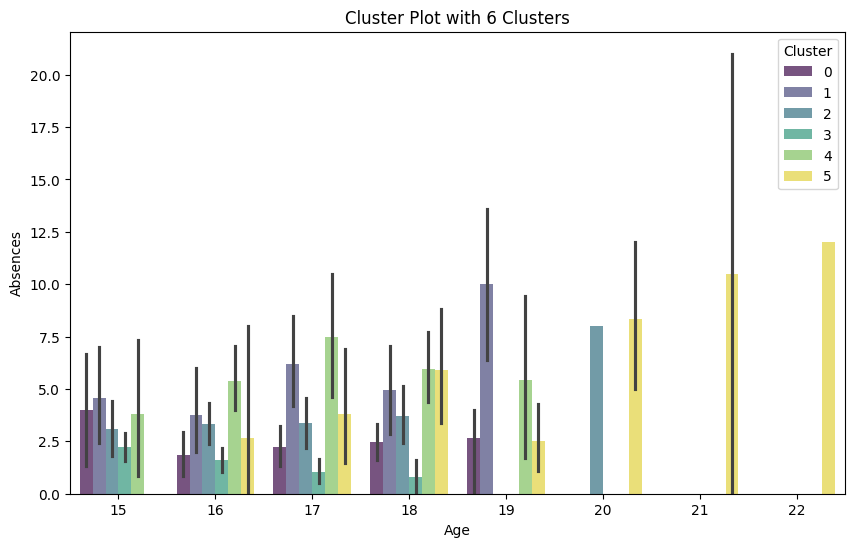

In [28]:
kmeans = sklearn.cluster.KMeans(n_clusters=6, random_state=13)
df['cluster'] = kmeans.fit_predict(X_stand)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='age', y='absences', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Cluster Plot with 6 Clusters')
plt.xlabel('Age')
plt.ylabel('Absences')
plt.legend(title='Cluster')

## Description
### Bars and black lines
- The colored bars represent the average number of absences for each cluster at a specific age.
- The black lines above the bars show the variation (the range or uncertainty in the data).

### Outcome
- For most ages (15–19), there are several groups with different levels of absences.
- At ages 20, 21 and 22, only one or two groups remain, meaning fewer data points for these ages.
- In some groups, absences increase slightly with age, but the variation also becomes bigger, as shown by the longer black lines.

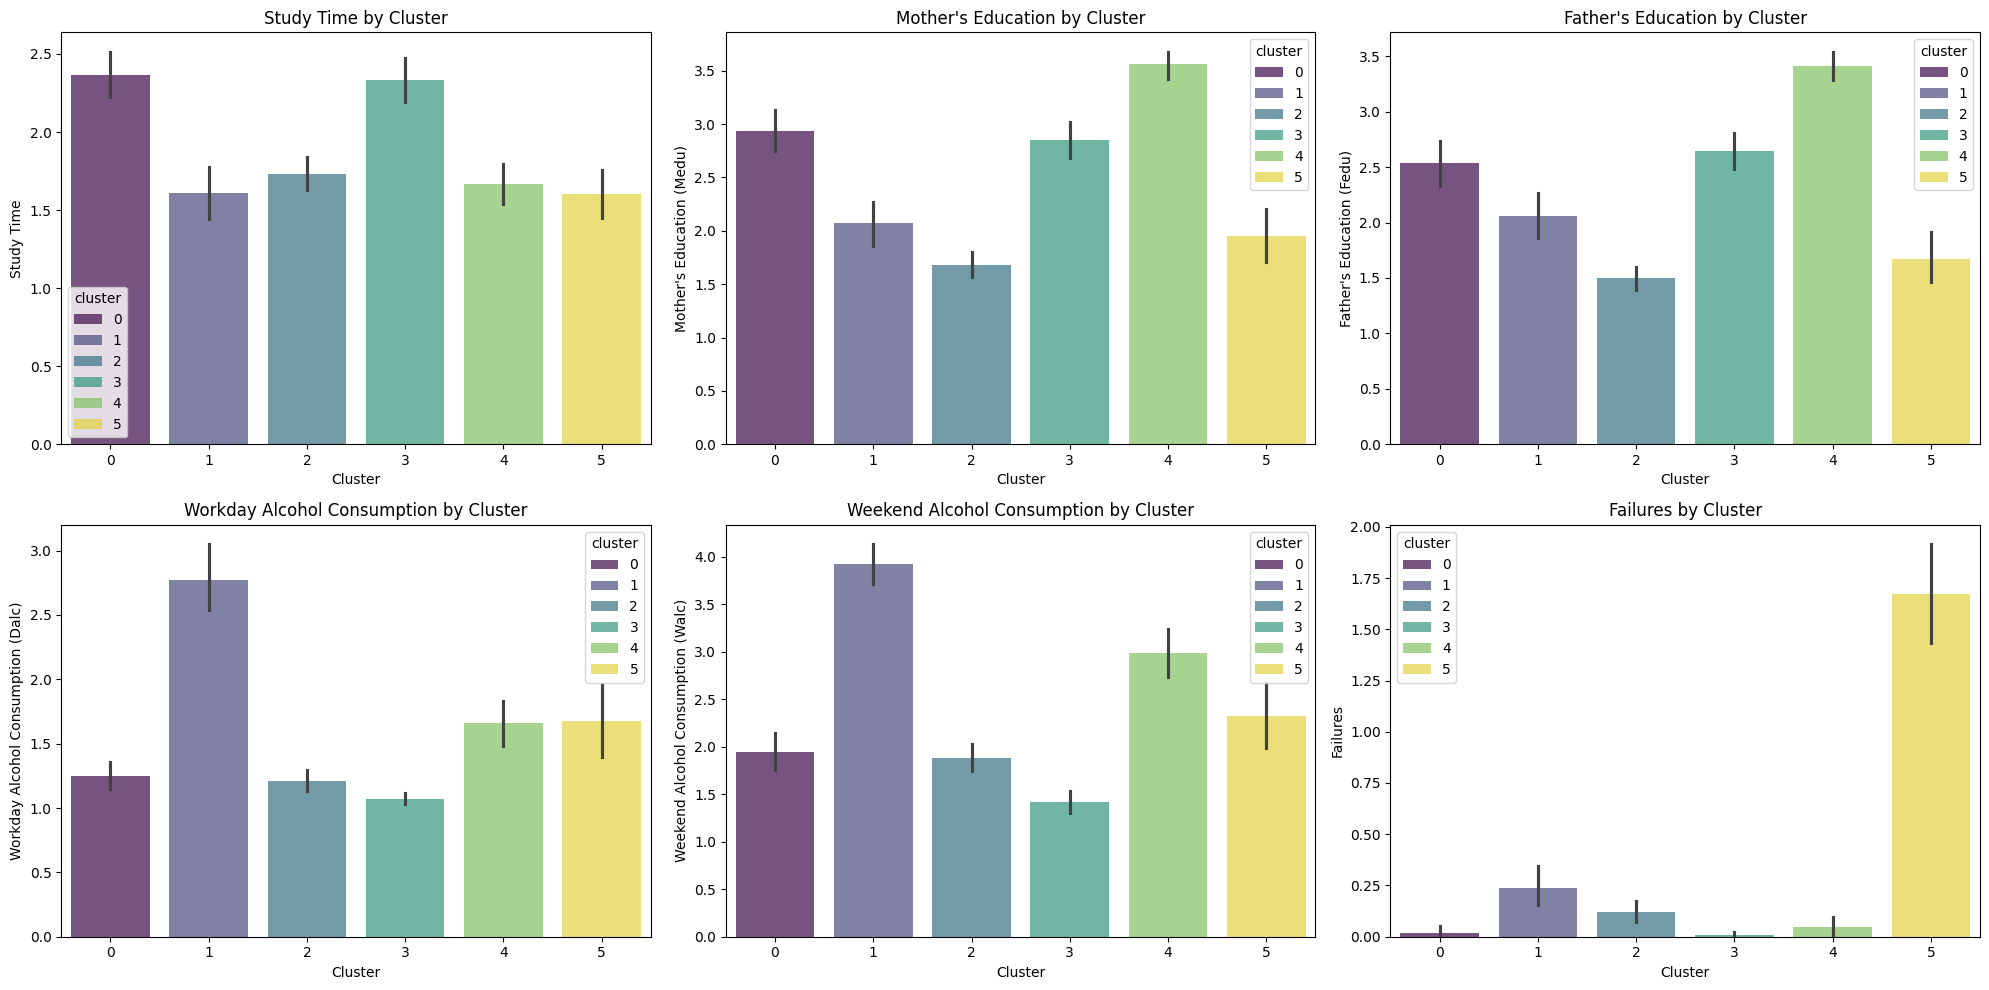

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Create a 2x3 grid of subplots

# Bar plot for comparing 'studytime' among clusters
sns.barplot(data=df, x='cluster', y='studytime', hue='cluster', palette='viridis', alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Study Time by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Study Time')

# Bar plot for comparing 'Medu' among clusters
sns.barplot(data=df, x='cluster', y='Medu', hue='cluster', palette='viridis', alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Mother\'s Education by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Mother\'s Education (Medu)')

# Bar plot for comparing 'Fedu' among clusters
sns.barplot(data=df, x='cluster', y='Fedu', hue='cluster', palette='viridis', alpha=0.7, ax=axes[0, 2])
axes[0, 2].set_title('Father\'s Education by Cluster')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].set_ylabel('Father\'s Education (Fedu)')

# Bar plot for comparing 'Dalc' (workday alcohol consumption) among clusters
sns.barplot(data=df, x='cluster', y='Dalc', hue='cluster', palette='viridis', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Workday Alcohol Consumption by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Workday Alcohol Consumption (Dalc)')

# Bar plot for comparing 'Walc' (weekend alcohol consumption) among clusters
sns.barplot(data=df, x='cluster', y='Walc', hue='cluster', palette='viridis', alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Weekend Alcohol Consumption by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Weekend Alcohol Consumption (Walc)')

# Bar plot for comparing 'failures' among clusters
sns.barplot(data=df, x='cluster', y='failures', hue='cluster', palette='viridis', alpha=0.7, ax=axes[1, 2])
axes[1, 2].set_title('Failures by Cluster')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Failures')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

## Clusters description
### Cluster 0
- Highest study time
- High parental education
- Low alcohol consumption (both workday and weekend)
- Almost no failures
### Cluster 1:
- Lowest study time
- Parental education is not that high
- Highest alcohol consumption (workday and weekend)
- Some failures
### Cluster 2:
- Meduim study time
- Lowest parental education compared to others
- Low alcohol consumption (workday and weekend)
- Very few failures
### Cluster 3:
- High study time
- Higher parental education
- Low alcohol consumption
- Very few failures
### Cluster 4:
- High study time
- Highest parental education
- Kinda high weekend alcohol consumption, but low workday consumption
- Almost no failures
### Cluster 5:
- Low study time
- Lowest parental education
- Low alcohol consumption (both workday and weekend)
- Highest failure rate

# Sumamry

## Interesting facts
- Does the amount of consumed alcohol have any effect on the success of the student?
  - Yes, higher alcohol consumption correlates with lower success rates
  - Cluster 1 (highest alcohol consumption) shows moderate failure rates, despite having moderate parental education
  - Clusters with low alcohol consumption (e.g., 0 and 4) have almost no failures
- Does parental education level somehow affect the child’s education level?
  - Yes, there is a clear positive relationship
  - Students in clusters with higher parental education (e.g., Clusters 0 and 4) tend to have higher study times and fewer failures
- Is failure connected somehow to study time?
  - Yes, low study time is strongly connected with higher failure rates
  - Cluster 5 (lowest study time) has the highest failure rate, while Clusters 0 and 4 (high study times) have almost no failures
- Does education level have an effect on child alcohol consumption?
  - Well yes but actualy no
  - Students with higher parental education (Clusters 0 and 4) show lower alcohol consumption overall
  - However, for example Cluster 1, with medium parental education, has the highest alcohol consumption